In [61]:
from datetime import datetime
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [32]:
csvfile = 'logs/Fit_2023-11-04_16-41.log'
# csvfile = 'logs/Fit_2023-11-04_15-22.log'

# csvfile = 'logs/Omega_Hot_Run_3g_2021-08-25_14-42.log'

In [33]:
df = pd.read_csv(
    csvfile,
    sep=',',
    skiprows=0,
    decimal='.'
)

In [34]:
df.describe()

,RPM,INTAKE_PRESSURE,TIMING_ADVANCE,THROTTLE_POS,THROTTLE_ACTUATOR,RELATIVE_THROTTLE_POS,ACCELERATOR_POS_D,ACCELERATOR_POS_E,timestamp
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,2237.318783,67.839947,18.843915,30.409275,28.174603,26.065982,34.650897,17.319743,1.699127e+09
std,738.749100,20.567177,8.787151,10.889130,16.449135,15.219133,9.205706,4.651907,1.430524e+02
min,1000.000000,15.000000,-24.000000,16.078431,7.058824,6.274510,18.823529,9.411765,1.699127e+09
25%,1746.750000,60.000000,14.500000,23.529412,18.039216,16.470588,31.764706,15.686275,1.699127e+09
50%,2031.000000,77.000000,20.000000,29.019608,26.274510,24.313725,34.901961,17.647059,1.699127e+09
75%,2517.250000,83.000000,25.500000,33.725490,32.941176,30.588235,37.254902,18.823529,1.699127e+09
max,5095.000000,89.000000,39.000000,78.431373,100.000000,92.549020,91.372549,45.882353,1.699127e+09


In [ ]:
df.info()

In [ ]:
df.head(20)

In [ ]:
df['RPM'].max()

In [36]:
df[df['THROTTLE_ACTUATOR'] == df['THROTTLE_ACTUATOR'].max()]

,RPM,INTAKE_PRESSURE,TIMING_ADVANCE,THROTTLE_POS,THROTTLE_ACTUATOR,RELATIVE_THROTTLE_POS,ACCELERATOR_POS_D,ACCELERATOR_POS_E,timestamp
716,4927.0,87,25.0,78.431373,100.0,92.54902,91.372549,45.882353,1.699127e+09


In [44]:
df['TIMING_ADVANCE'].value_counts()

 24.0    37
-1.0     35
 17.5    34
 19.0    28
 13.0    27
         ..
 39.0     1
 34.5     1
 3.5      1
 9.0      1
-24.0     1
Name: TIMING_ADVANCE, Length: 71, dtype: int64

In [48]:
df[df['TIMING_ADVANCE'] == 17.5]

,RPM,INTAKE_PRESSURE,TIMING_ADVANCE,THROTTLE_POS,THROTTLE_ACTUATOR,RELATIVE_THROTTLE_POS,ACCELERATOR_POS_D,ACCELERATOR_POS_E,timestamp
11,2261.0,83,17.5,34.117647,33.333333,30.980392,36.862745,18.431373,1.699127e+09
12,2290.0,83,17.5,33.725490,31.372549,29.411765,36.470588,18.431373,1.699127e+09
50,2039.0,77,17.5,28.627451,25.490196,23.529412,34.901961,17.647059,1.699127e+09
292,1677.0,68,17.5,23.921569,18.431373,17.254902,31.764706,16.078431,1.699127e+09
293,1683.0,67,17.5,23.921569,18.431373,16.862745,32.156863,16.078431,1.699127e+09
294,1681.0,68,17.5,23.921569,18.823529,17.254902,32.156863,16.078431,1.699127e+09
297,1703.0,68,17.5,23.921569,18.431373,16.862745,31.764706,16.078431,1.699127e+09
316,1966.0,78,17.5,28.235294,25.098039,23.137255,35.294118,17.647059,1.699127e+09
317,2166.0,81,17.5,31.372549,31.764706,29.411765,36.862745,18.431373,1.699127e+09
362,1758.0,22,17.5,16.470588,7.058824,6.666667,18.823529,9.411765,1.699127e+09


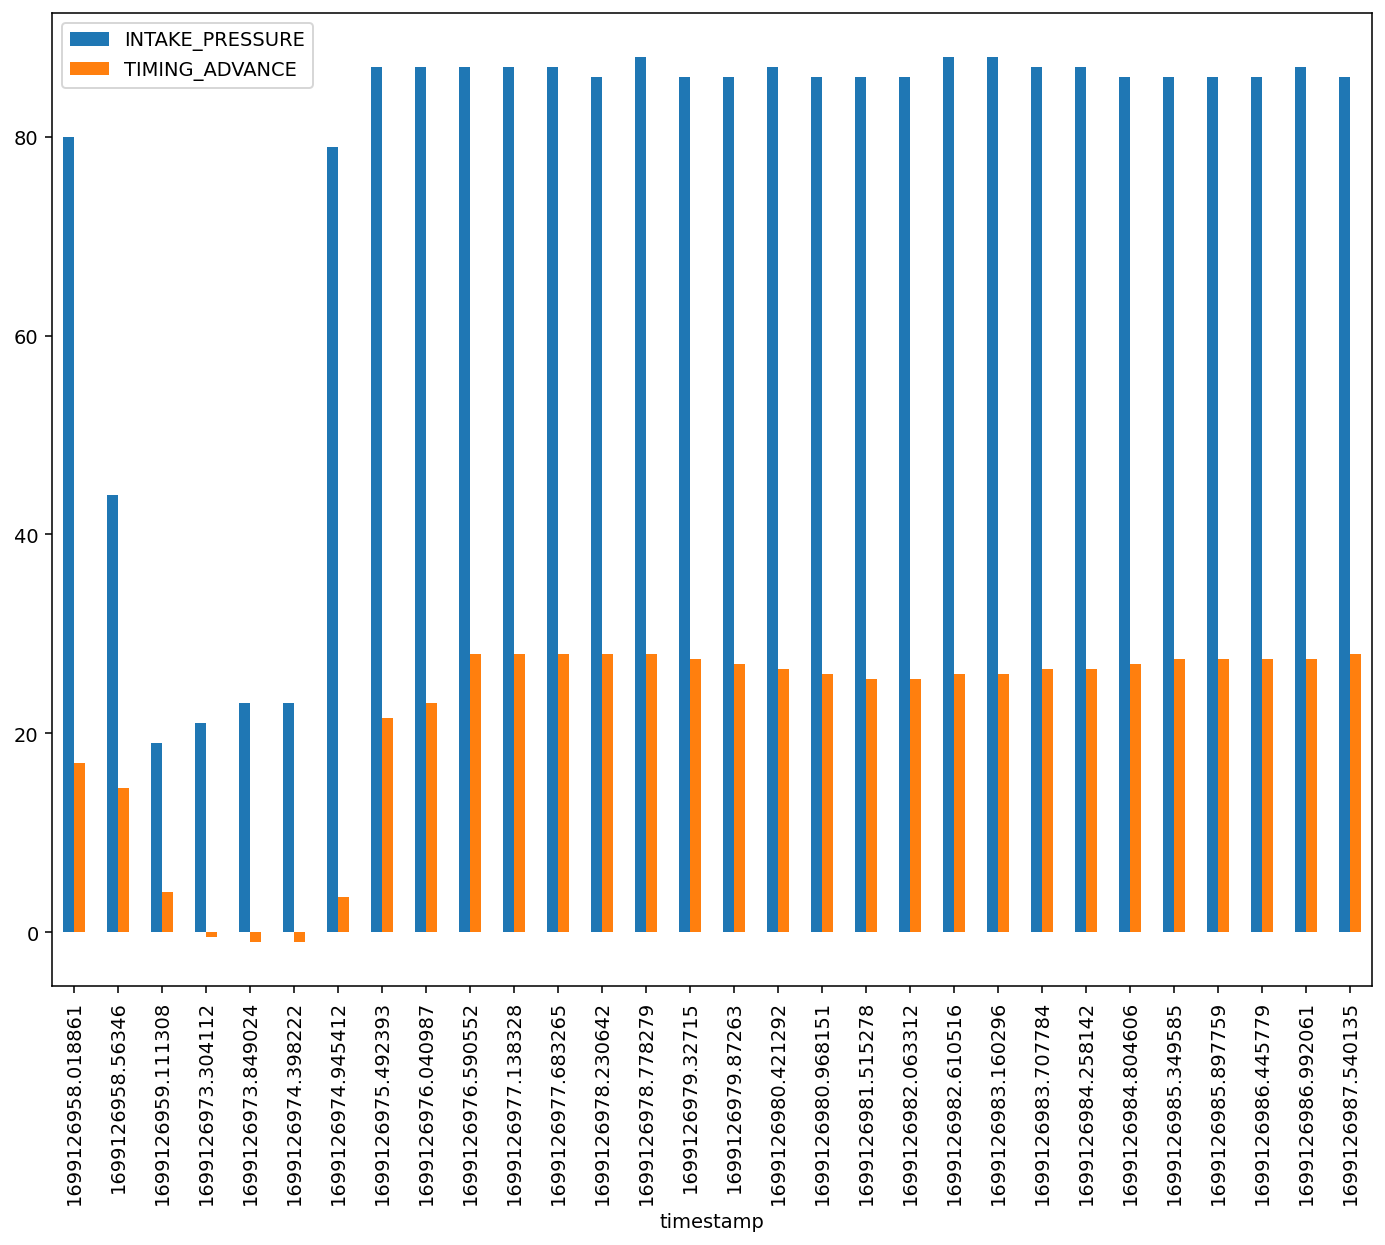

In [91]:
import seaborn as sns

mpl.rcParams["figure.figsize"] = [10.50, 5.50]
mpl.rcParams["figure.autolayout"] = True
mpl.rcParams["figure.dpi"] = 140

# df.set_index('timestamp').plot(y="RPM")
df.iloc[90:120].plot(x="timestamp", y=["INTAKE_PRESSURE","TIMING_ADVANCE"], kind="bar", figsize=(10, 9))
# df.INTAKE_PRESSURE.plot()

# bar_plot = sns.lineplot(x='TIMING_ADVANCE', y='INTAKE_PRESSURE', data=df.iloc[0:25])
# bar_plot = sns.barplot(x='RPM', y='INTAKE_PRESSURE', data=df.iloc[0:15])
# plt.xticks(rotation=45)

plt.show()

<AxesSubplot: xlabel='Advance', ylabel='Frequency'>

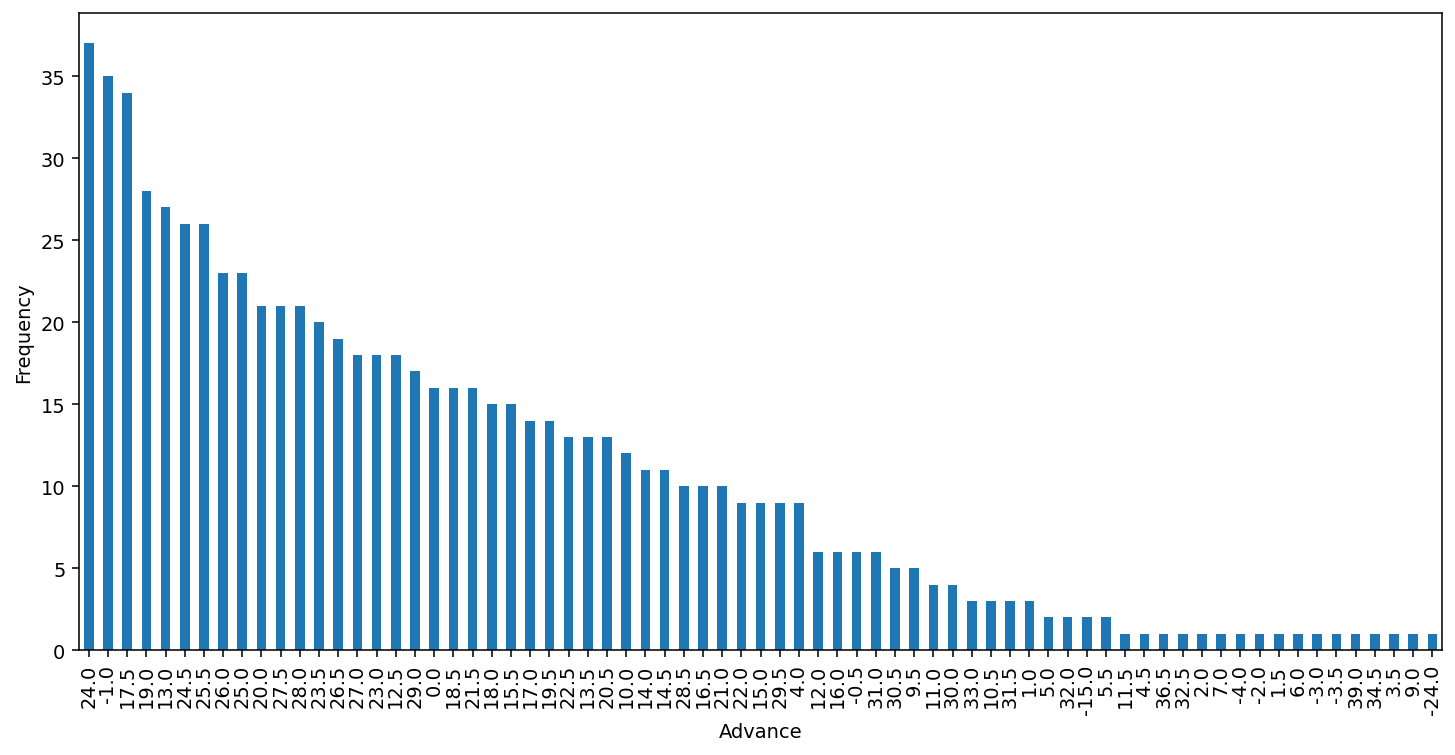

In [69]:
fig, ax = plt.subplots()
df['TIMING_ADVANCE'].value_counts().plot(ax=ax, kind='bar', xlabel='Advance', ylabel='Frequency')

In [12]:
df['O2_S1_WR_CURRENT'].value_counts()

-0.031250    24
 0.000000    22
-0.023438    22
-0.003906    20
-0.019531    20
             ..
 2.542969     1
-0.300781     1
 2.378906     1
-0.781250     1
-0.500000     1
Name: O2_S1_WR_CURRENT, Length: 228, dtype: int64

In [13]:
df['O2_S5_WR_CURRENT'].value_counts()

-0.019531    32
-0.031250    24
-0.046875    23
-0.027344    21
 0.003906    19
             ..
 2.625000     1
 2.339844     1
 0.781250     1
 0.113281     1
-0.347656     1
Name: O2_S5_WR_CURRENT, Length: 230, dtype: int64